 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
# Set the file paths
whale_returns = Path("./Resources/whale_returns.csv")
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Display a few rows
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
whale_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                       True                True   
2015-03-03                      False               False   
2015-03-04                      False               False   
2015-03-05                      False               False   
2015-03-06                      False               False   
...                               ...                 ...   
2019-04-25                      False               False   
2019-04-26                      False               False   
2019-04-29                      False               False   
2019-04-30                      False               False   
2019-05-01                      False               False   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02  

In [5]:
whale_df.isnull().sum() / len(whale_df) * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [6]:
whale_df.duplicated()

Date
2015-03-02    False
2015-03-03    False
2015-03-04    False
2015-03-05    False
2015-03-06    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1060, dtype: bool

In [7]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [8]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading whale returns
# Set the file paths
algo_returns = Path("./Resources/algo_returns.csv")
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Display a few rows
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [11]:
algo_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1241 rows x 2 columns]>

In [12]:
algo_df.isnull().sum() / len(algo_df) * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [13]:
algo_df.duplicated()

Date
2014-05-28    False
2014-05-29    False
2014-05-30    False
2014-06-02    False
2014-06-03    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1241, dtype: bool

In [14]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [15]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [16]:
# Reading S&P 500 Closing Prices
sp500_history = Path("./Resources/sp500_history.csv")
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
#sp500_df = pd.read_csv(sp500_history, index_col="Close", infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_history, infer_datetime_format=True, parse_dates=True)
# Display a few rows
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [17]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [18]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$',"").str.replace(',',"")
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])


C:\Users\FANS\AppData\Local\Temp\ipykernel_2332\1979370990.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$',"").str.replace(',',"")


In [19]:
# Calculate Daily Returns
sp500_df = sp500_df.set_index('Date')

In [20]:
# Drop nulls
sp500_df = sp500_df.pct_change().dropna().copy()
sp500_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [21]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns = {'Close': 'S&P Close'})
sp500_df.head()

,S&P Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_returns_daily = pd.concat([whale_df, algo_df,sp500_df], axis=1, join="inner")
whale_returns_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

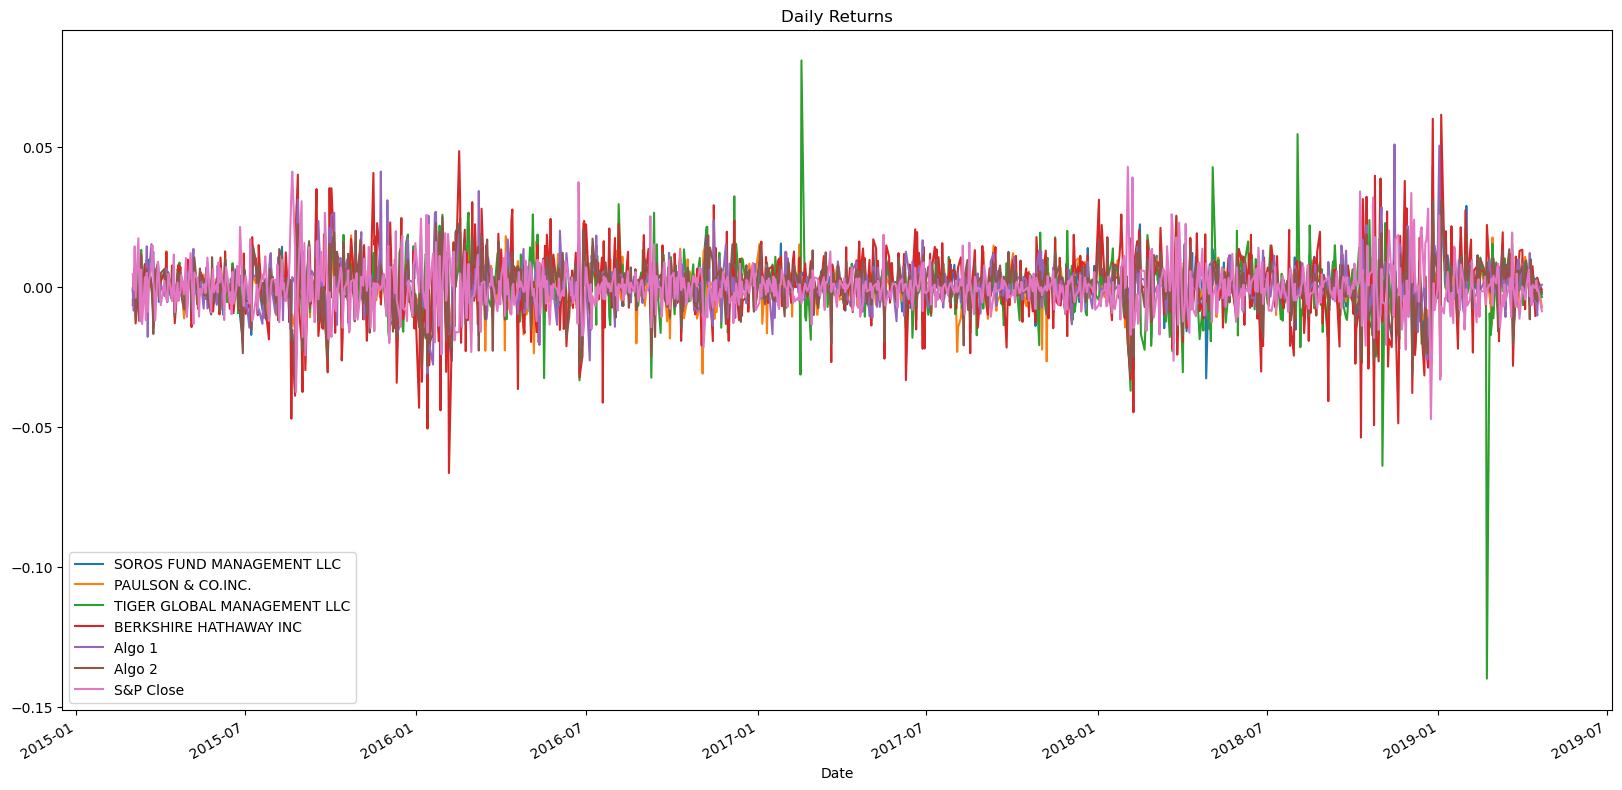

In [23]:
# Plot daily returns of all portfolios
whale_returns_daily.plot(figsize=(20,10), title=("Daily Returns"))

#### Calculate and Plot cumulative returns.

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + whale_returns_daily).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<Axes: title={'center': 'Culmulative Returns'}, xlabel='Date'>

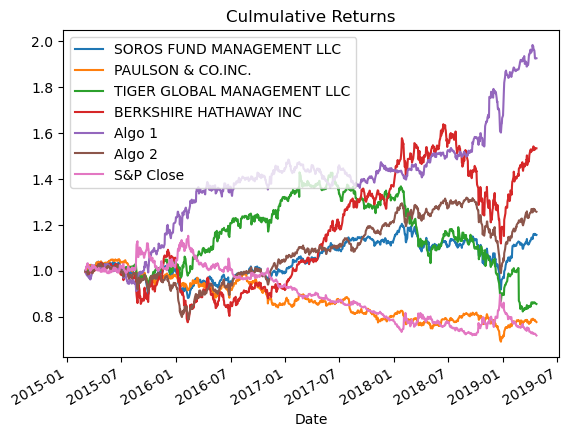

In [25]:
# Plot cumulative returns
cumulative_returns.plot(title=("Culmulative Returns"))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Whale Portofolio Box Plot

<Axes: >

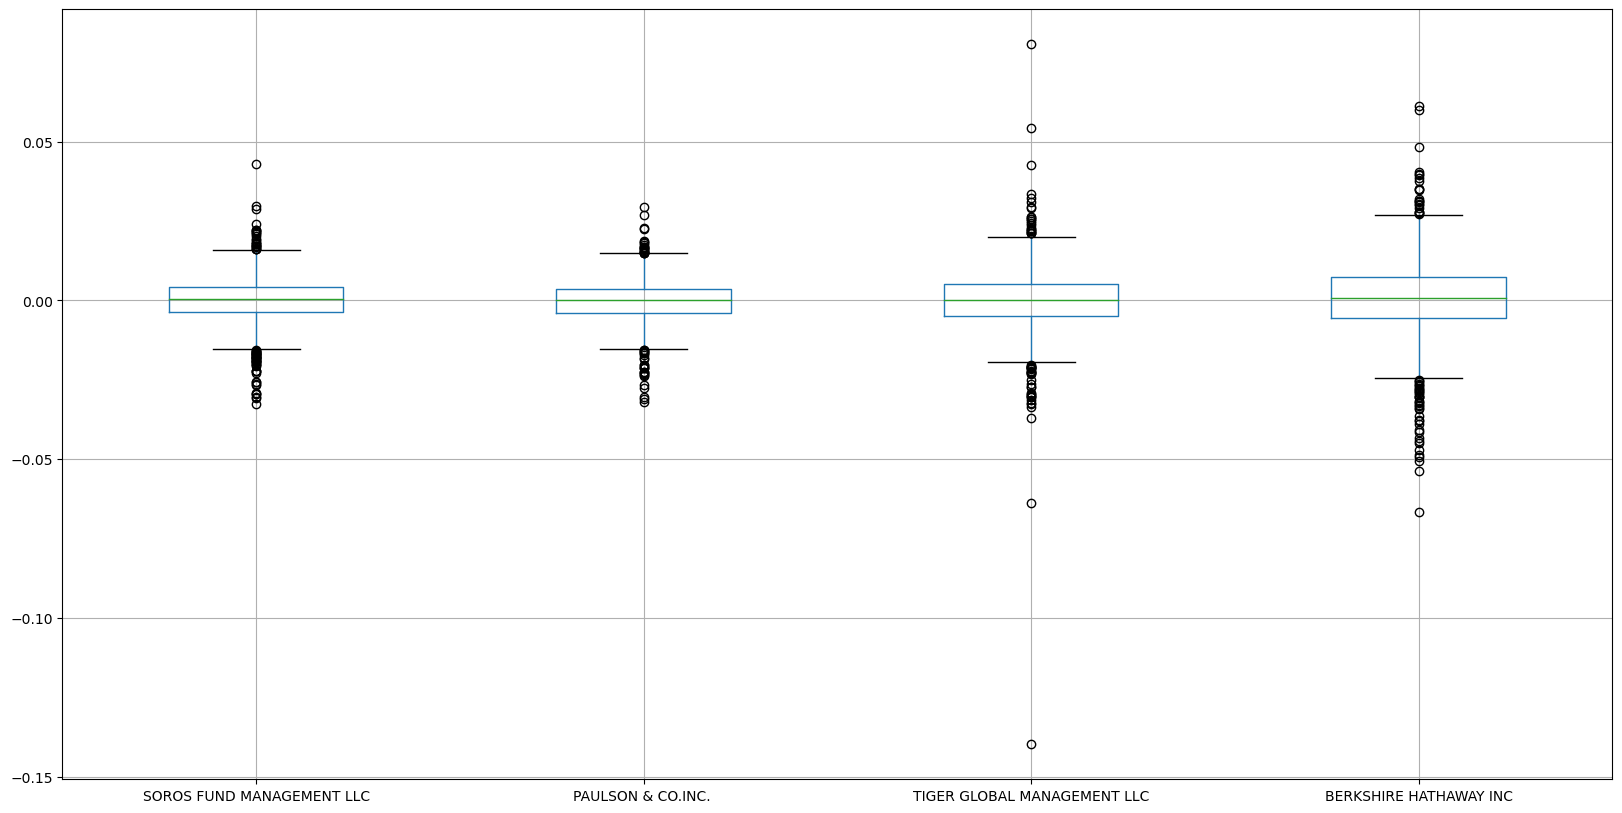

In [26]:
# Box plot to visually show risk
whale_df.boxplot(figsize=(20, 10))

Algo Portofolio Box Plot

<Axes: >

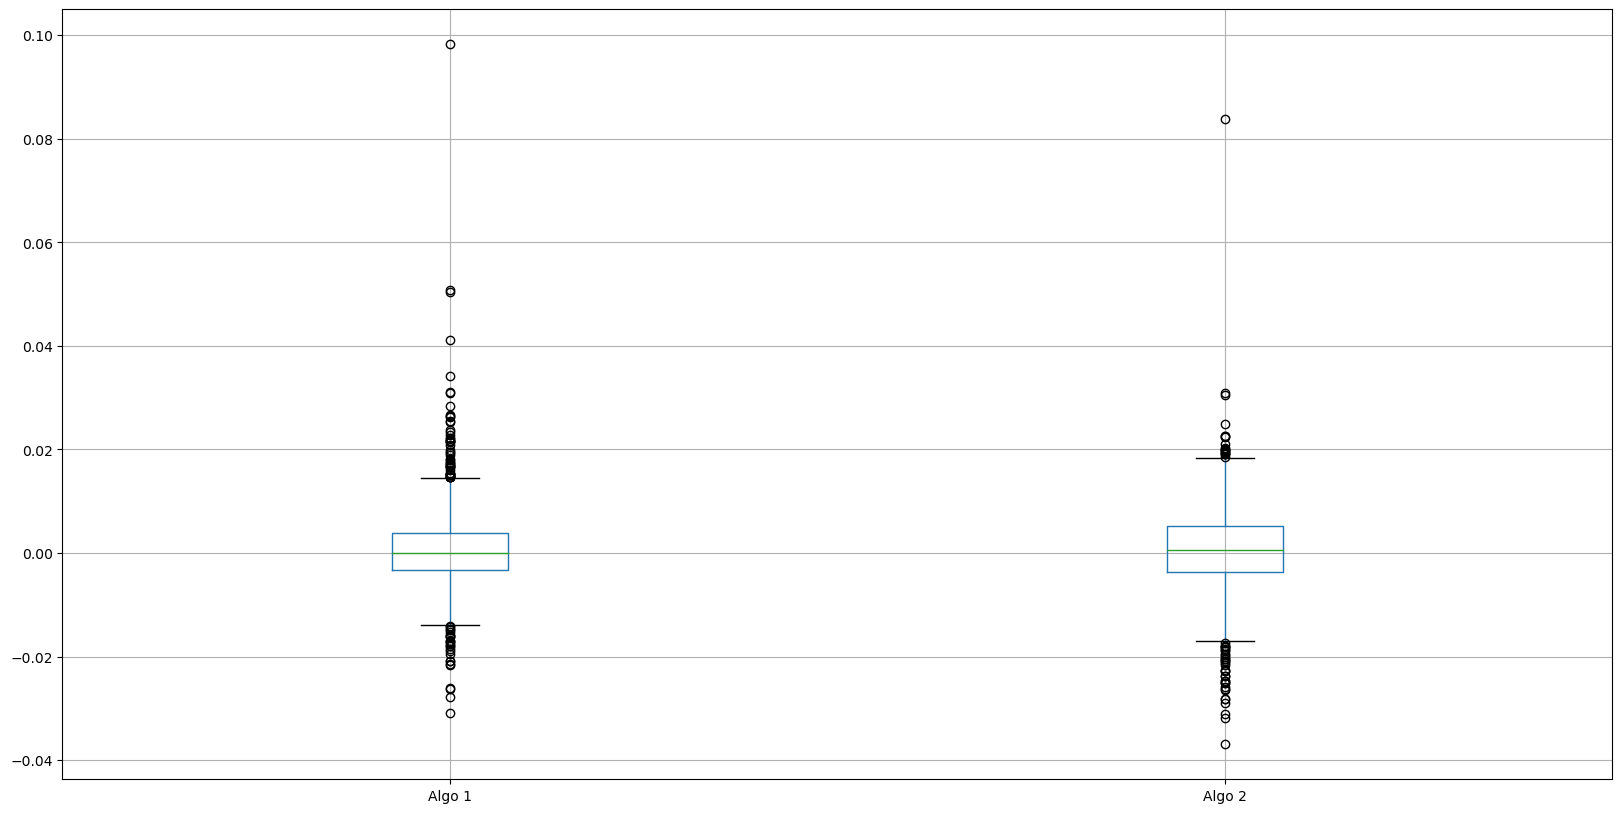

In [27]:
# Box plot to visually show risk
algo_df.boxplot(figsize=(20, 10))

S&P Portofolio Box Plot

<Axes: >

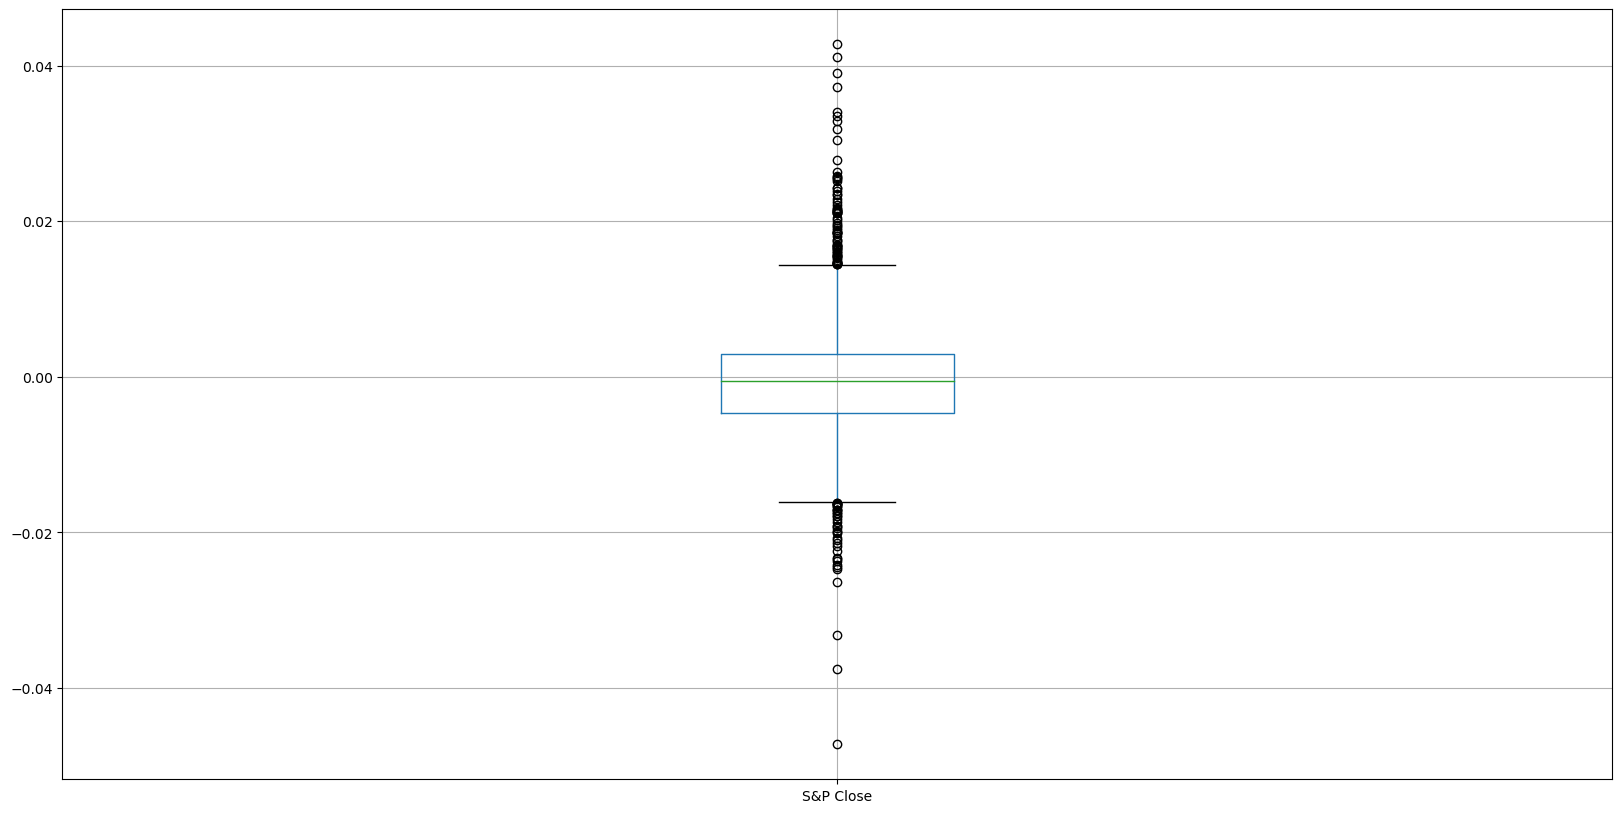

In [28]:
# Box plot to visually show risk
sp500_df.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [29]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = whale_returns_daily.std()
all_portfolio_std.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [30]:
# Calculate  the daily standard deviation of S&P 500
sp500_df_std = sp500_df.std()
sp500_df_std.head()

S&P Close    0.008135
dtype: float64

In [31]:
# Determine which portfolios are riskier than the S&P 500
whale_df_std = whale_df.std()
whale_df_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [32]:
algo_df_std = algo_df.std()
algo_df_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std*np.sqrt(252)
annualized_std.head(7)#(7) for the number of rolls we want displayed 

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P Close                      0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling STD For All Portfolios With 21-Day Window'}, xlabel='Date'>

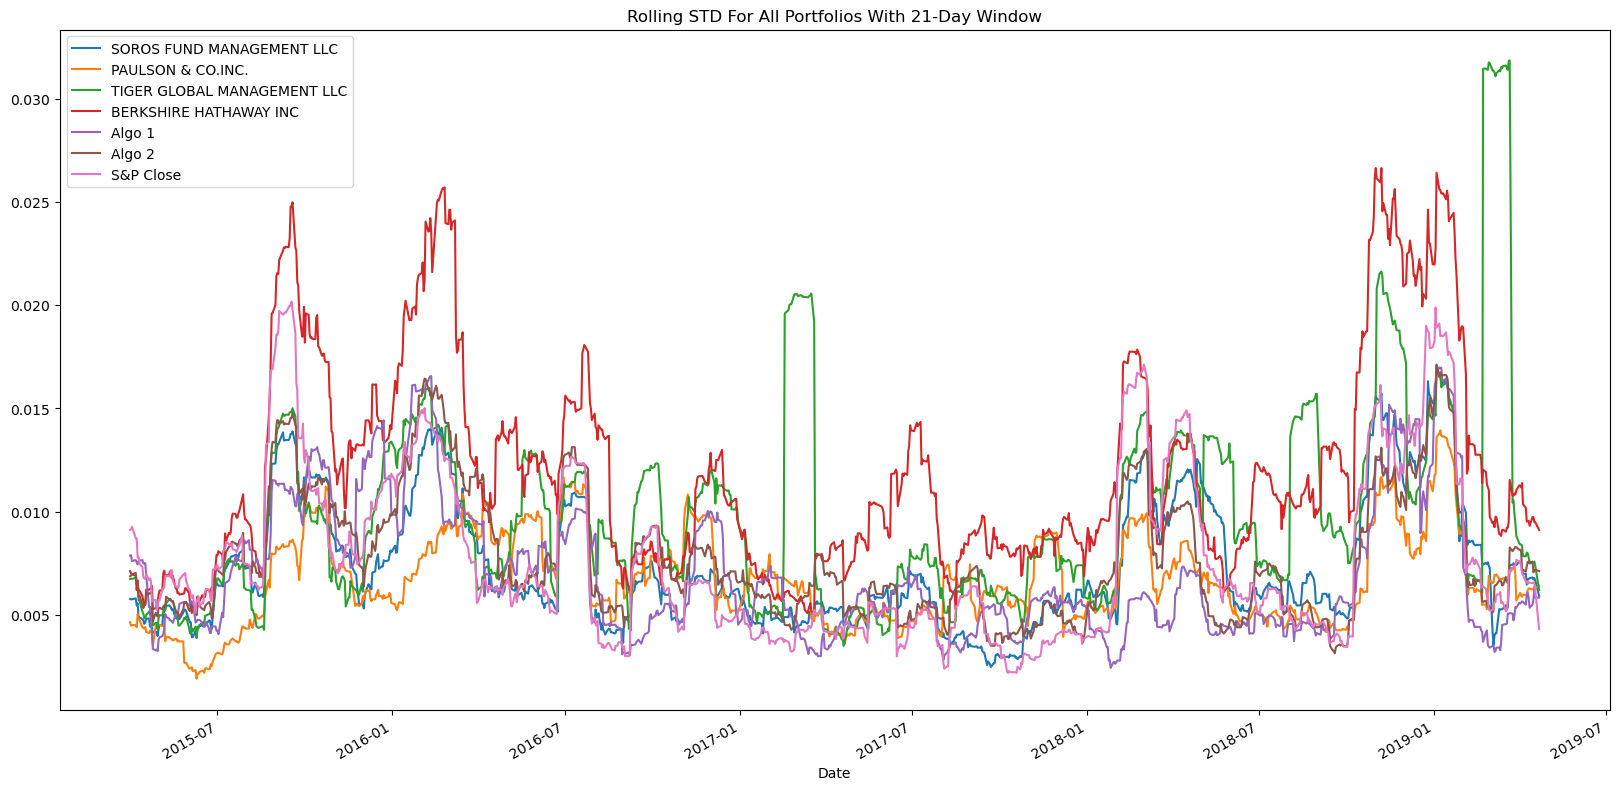

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_returns_daily.rolling(window=21).std()
# Plot the rolling standard deviation
whale_returns_daily.rolling(window=21).std().plot(figsize=(20,10), title=("Rolling STD For All Portfolios With 21-Day Window"))

### Calculate and plot the correlation

In [35]:
# Calculate the correlation
price_correlation = whale_returns_daily.corr()
price_correlation.head(7)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


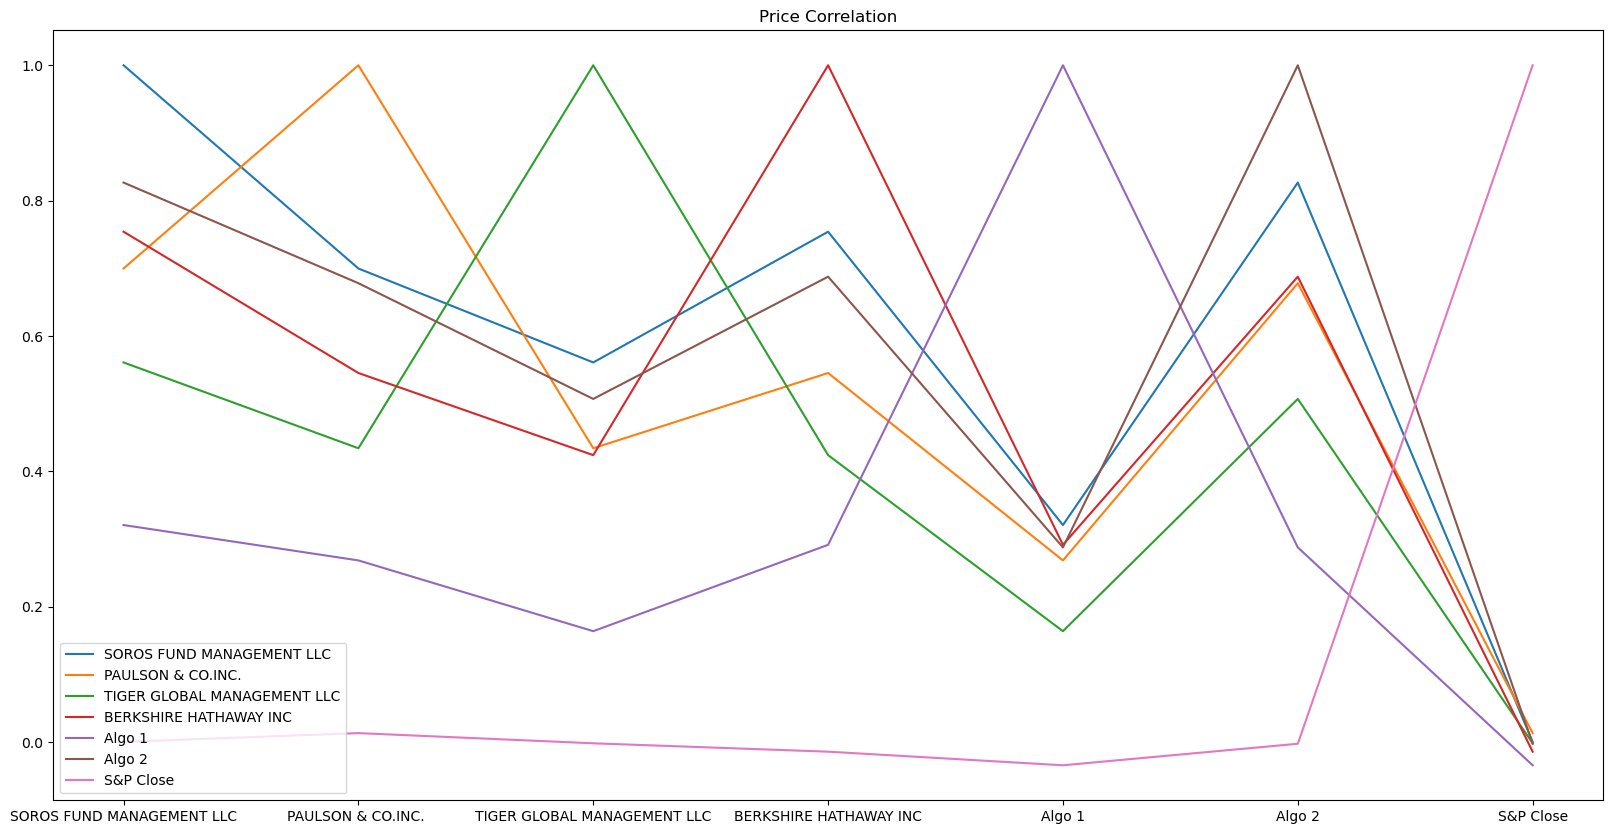

In [36]:
# Display de correlation matrix
price_correlation = whale_returns_daily.corr().plot(figsize=(20,10), title=("Price Correlation"))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [37]:
# Calculate covariance of a single portfolio
SOROS_cov = whale_df['SOROS FUND MANAGEMENT LLC'].cov(sp500_df['S&P Close'])
SOROS_cov

3.889726983061925e-08

In [38]:
# Calculate variance of S&P 500
variance = sp500_df['S&P Close'].var()
variance 

6.617241051948298e-05

In [39]:
# Computing beta
SOROS_beta = SOROS_cov / variance 
SOROS_beta

0.0005878170301679855

<Axes: title={'center': '90 Day Rolling Covariance: S&P 500 vs. SOROS'}, xlabel='Date'>

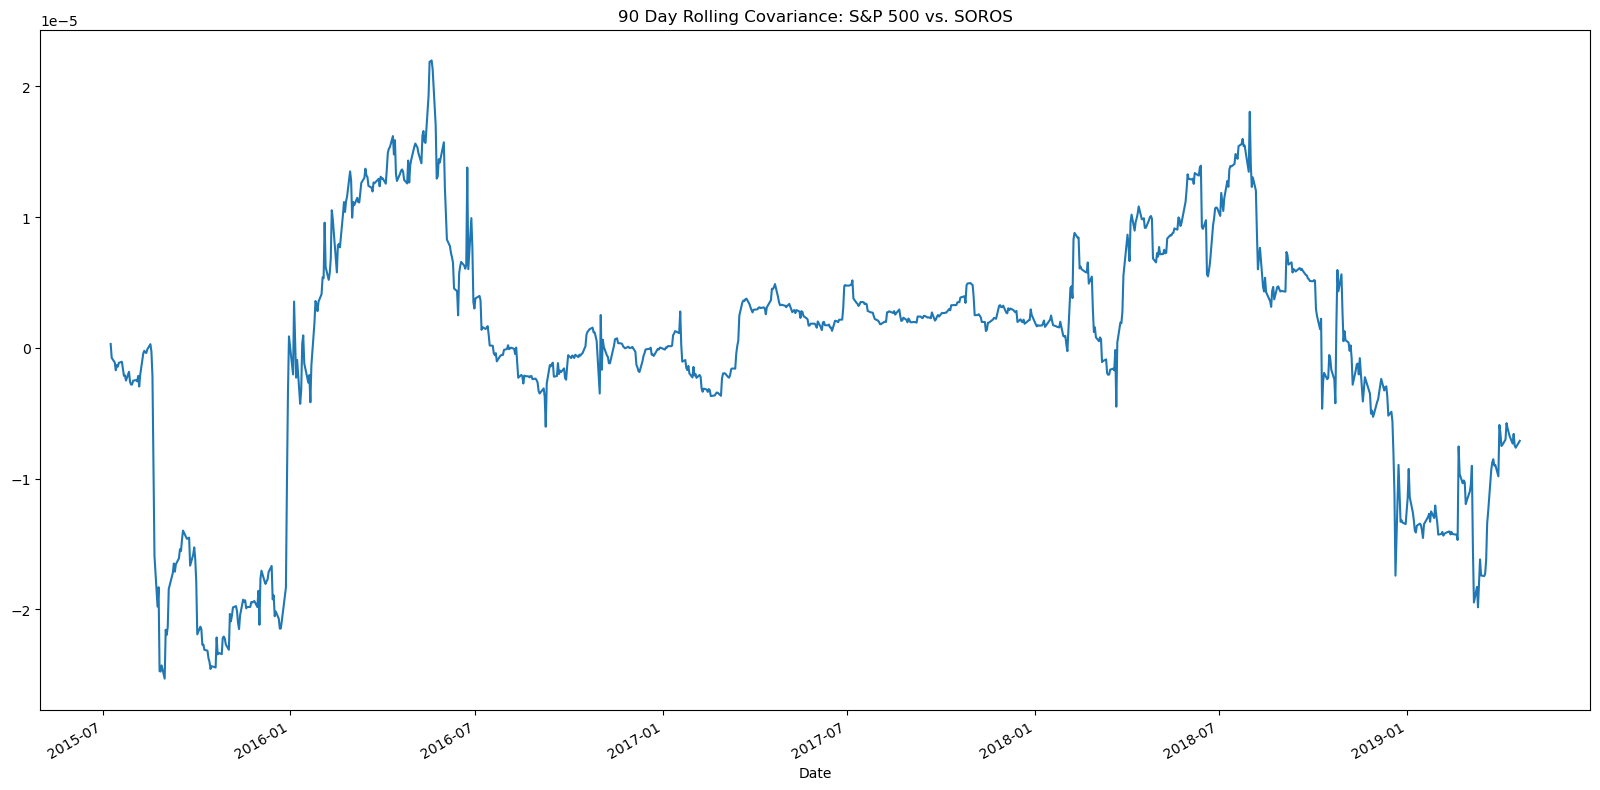

In [40]:
# Plot beta trend
rolling_cov = whale_returns_daily['SOROS FUND MANAGEMENT LLC'].rolling(window=90).cov(whale_returns_daily['S&P Close'])
rolling_cov.plot(figsize=(20,10), title='90 Day Rolling Covariance: S&P 500 vs. SOROS')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Rolling Statistics Challenge: Exponentially Weighted Average'}, xlabel='Date'>

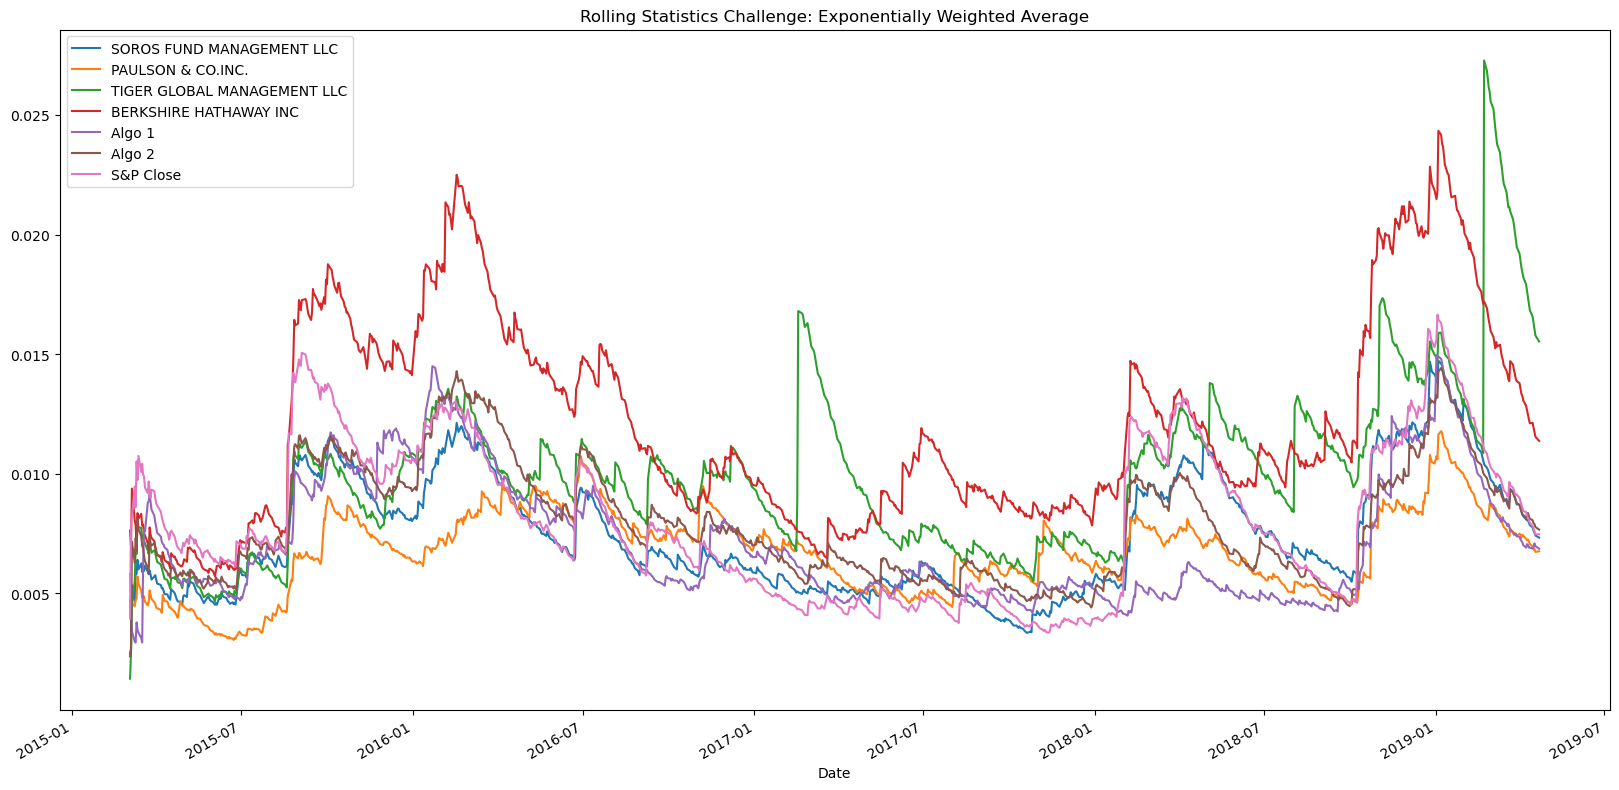

In [41]:
# Use `ewm` to calculate the rolling window
whale_returns_ewm = whale_returns_daily.ewm(halflife=21).std()
whale_returns_ewm.plot(figsize=(20,10), title="Rolling Statistics Challenge: Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
sharpe_ratio_all = (whale_returns_daily.mean() * 252) / (whale_returns_daily.std() * np.sqrt(252))
sharpe_ratio_all

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P Close                     -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

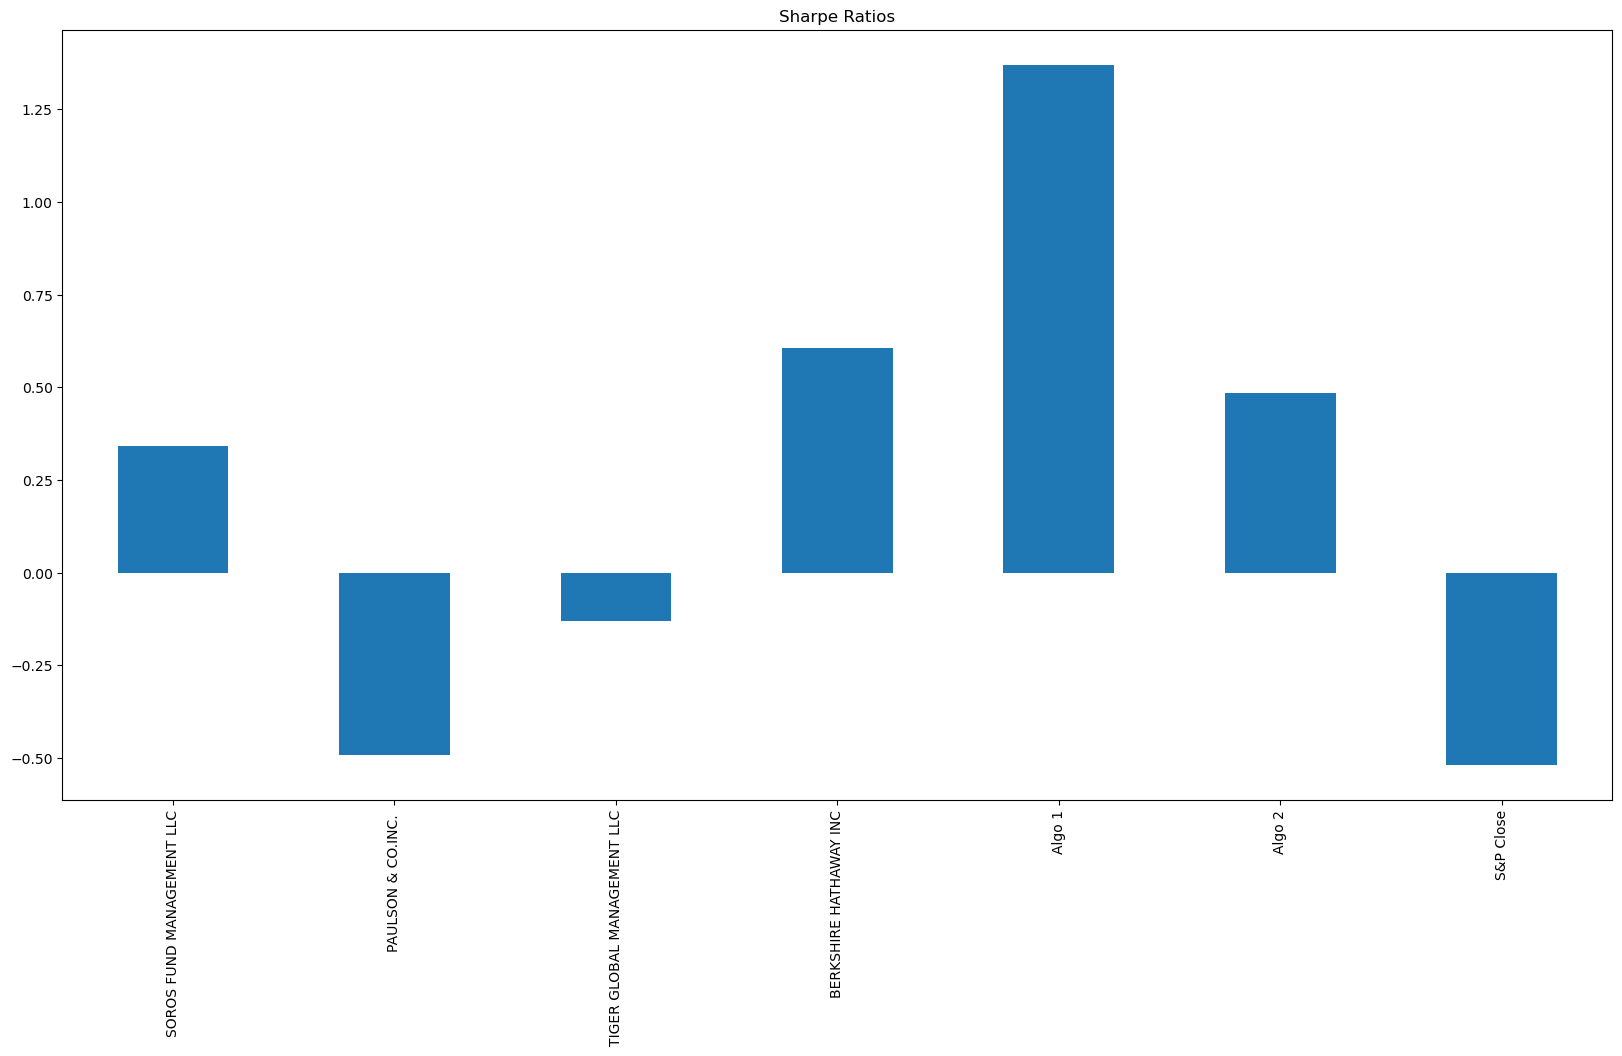

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_all.plot.bar(figsize=(20,10), title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 has a Sharpe Ratio above 1 which is generally considered good, offering excess returns relative to volatility. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Reading data from 1st stock
ADBE_returns = Path("./Resources/ADBE_historical.csv")
ADBE_df = pd.read_csv(ADBE_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
ADBE_df.drop("ADBE", inplace=True, axis=1)
ADBE_df = ADBE_df.rename(columns = {'Close': 'ADBE'})
ADBE_df.head()

,ADBE
Date,
2016-01-04 16:00:00,91.97
2016-01-05 16:00:00,92.34
2016-01-06 16:00:00,91.02
2016-01-07 16:00:00,89.11
2016-01-08 16:00:00,87.85


In [49]:
# Reading data from 2nd stock
AMZN_returns = Path("./Resources/AMZN_historical.csv")
AMZN_df = pd.read_csv(AMZN_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
AMZN_df.drop("AMZN", inplace=True, axis=1)
AMZN_df = AMZN_df.rename(columns = {'Close': 'AMZN'})
AMZN_df.head()

,AMZN
Date,
2016-01-04 16:00:00,31.85
2016-01-05 16:00:00,31.69
2016-01-06 16:00:00,31.63
2016-01-07 16:00:00,30.40
2016-01-08 16:00:00,30.35


In [50]:
# Reading data from 3rd stock
META_returns = Path("./Resources/META_historical.csv")
META_df = pd.read_csv(META_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
META_df.drop("META", inplace=True, axis=1)
META_df = META_df.rename(columns = {'Close': 'META'})
META_df.head()

,META
Date,
2016-01-04 16:00:00,102.22
2016-01-05 16:00:00,102.73
2016-01-06 16:00:00,102.97
2016-01-07 16:00:00,97.92
2016-01-08 16:00:00,97.33


In [51]:
# Combine all stocks in a single DataFrame
portfolio_combined_df = pd.concat([ADBE_df, AMZN_df,META_df], axis=1, join="inner")
portfolio_combined_df.head()

,ADBE,AMZN,META
Date,,,
2016-01-04 16:00:00,91.97,31.85,102.22
2016-01-05 16:00:00,92.34,31.69,102.73
2016-01-06 16:00:00,91.02,31.63,102.97
2016-01-07 16:00:00,89.11,30.40,97.92
2016-01-08 16:00:00,87.85,30.35,97.33


In [52]:
# Reorganize portfolio data by having a column per symbol
portfolio_combined_df.head()

,ADBE,AMZN,META
Date,,,
2016-01-04 16:00:00,91.97,31.85,102.22
2016-01-05 16:00:00,92.34,31.69,102.73
2016-01-06 16:00:00,91.02,31.63,102.97
2016-01-07 16:00:00,89.11,30.40,97.92
2016-01-08 16:00:00,87.85,30.35,97.33


In [63]:
# Calculate daily returns
portfolio_daily_returns = portfolio_combined_df.pct_change()
# Drop NAs
portfolio_daily_returns = portfolio_daily_returns.dropna()
portfolio_daily_returns.index = portfolio_daily_returns.index.date
# Display sample data
portfolio_daily_returns

,ADBE,AMZN,META
2016-01-05,0.004023,-0.005024,0.004989
2016-01-06,-0.014295,-0.001893,0.002336
2016-01-07,-0.020984,-0.038887,-0.049043
2016-01-08,-0.014140,-0.001645,-0.006025
2016-01-11,0.017416,0.017792,0.001849
...,...,...,...
2018-12-21,-0.045049,-0.057092,-0.063343
2018-12-24,-0.017433,-0.024249,-0.007123
2018-12-26,0.086713,0.094494,0.081573
2018-12-27,0.009823,-0.006390,0.002534


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [64]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_daily_returns = portfolio_daily_returns.dot(weights)
# Display sample data
portfolio_daily_returns.head()

2016-01-05    0.001330
2016-01-06   -0.004617
2016-01-07   -0.036305
2016-01-08   -0.007270
2016-01-11    0.012353
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [65]:
# Join your returns DataFrame to the original returns DataFrame
combine_portfolios_df = pd.concat([portfolio_combined_returns, whale_returns_daily], axis=1, join="inner")
combine_portfolios_df.head(10)

C:\Users\FANS\AppData\Local\Temp\ipykernel_2332\1685021149.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  combine_portfolios_df = pd.concat([portfolio_combined_returns, whale_returns_daily], axis=1, join="inner")


,ADBE,AMZN,META,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
2016-01-05,0.004023,-0.005024,0.004989,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,0.013290
2016-01-06,-0.014295,-0.001893,0.002336,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,0.024276
2016-01-07,-0.020984,-0.038887,-0.049043,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,0.010957
2016-01-08,-0.014140,-0.001645,-0.006025,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000853
2016-01-11,0.017416,0.017792,0.001849,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.007742
2016-01-12,0.004923,0.000000,0.019075,0.002875,0.000703,0.010685,0.018389,0.000976,-0.008697,0.025605
2016-01-13,-0.016923,-0.058271,-0.039549,-0.022278,-0.014762,-0.030349,-0.050612,-0.030951,-0.028273,-0.016422
2016-01-14,0.016988,0.019251,0.030700,0.012926,0.012863,0.003902,0.015141,0.025340,0.010145,0.022076
2016-01-15,-0.007016,-0.038449,-0.034563,-0.018823,-0.009387,-0.020972,-0.027998,-0.020941,-0.020110,-0.000532
2016-01-19,0.000112,0.007366,0.003054,-0.008979,-0.005700,0.008740,0.008348,-0.027787,-0.016735,0.011832


In [66]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine_portfolios_df.sort_index

<bound method DataFrame.sort_index of                 ADBE      AMZN      META  SOROS FUND MANAGEMENT LLC  \
2016-01-05  0.004023 -0.005024  0.004989                  -0.000398   
2016-01-06 -0.014295 -0.001893  0.002336                  -0.011558   
2016-01-07 -0.020984 -0.038887 -0.049043                  -0.020495   
2016-01-08 -0.014140 -0.001645 -0.006025                  -0.008149   
2016-01-11  0.017416  0.017792  0.001849                  -0.005272   
...              ...       ...       ...                        ...   
2018-12-21 -0.045049 -0.057092 -0.063343                  -0.022720   
2018-12-24 -0.017433 -0.024249 -0.007123                  -0.019152   
2018-12-26  0.086713  0.094494  0.081573                   0.042977   
2018-12-27  0.009823 -0.006390  0.002534                   0.004184   
2018-12-28 -0.008928  0.011221 -0.009813                   0.001145   

            PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
2016-01-05            0.002242                

In [67]:
combine_portfolios_df.dropna()
combine_portfolios_df.head()

,ADBE,AMZN,META,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
2016-01-05,0.004023,-0.005024,0.004989,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,0.013290
2016-01-06,-0.014295,-0.001893,0.002336,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,0.024276
2016-01-07,-0.020984,-0.038887,-0.049043,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,0.010957
2016-01-08,-0.014140,-0.001645,-0.006025,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000853
2016-01-11,0.017416,0.017792,0.001849,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.007742


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [68]:
# Calculate the annualized `std`
annualized_std = combine_portfolios_df.std()*np.sqrt(252)
annualized_std.head()

ADBE                         0.278836
AMZN                         0.293868
META                         0.291156
SOROS FUND MANAGEMENT LLC    0.125417
PAULSON & CO.INC.            0.115581
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling STD With 21-Day Window'}>

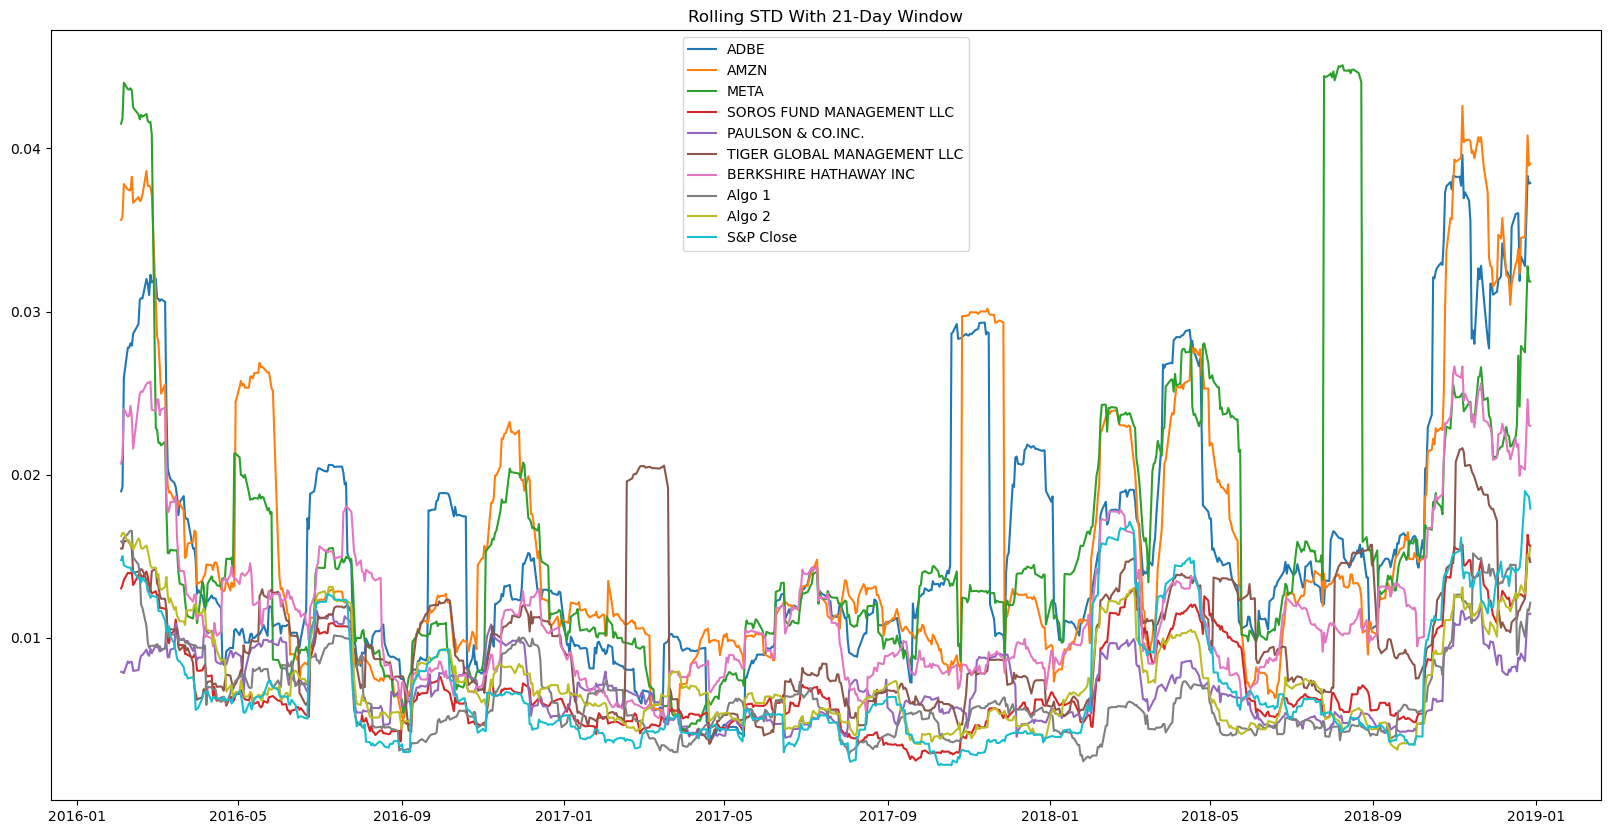

In [69]:
# Calculate rolling standard deviation
combine_portfolios_df.rolling(window=21).std()
# Plot rolling standard deviation
combine_portfolios_df.rolling(window=21).std().plot(figsize=(20,10), title=("Rolling STD With 21-Day Window"))

### Calculate and plot the correlation

In [70]:
# Calculate and plot the correlation
portfolio2_correlation = combine_portfolios_df.corr()
portfolio2_correlation.head(7)

,ADBE,AMZN,META,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
ADBE,1.000000,0.578598,0.468027,0.586476,0.398549,0.409261,0.652101,0.206786,0.562099,-0.012863
AMZN,0.578598,1.000000,0.590039,0.539077,0.374050,0.338750,0.640162,0.246188,0.492218,0.035397
META,0.468027,0.590039,1.000000,0.488527,0.367274,0.305075,0.582661,0.193952,0.431912,-0.051588
SOROS FUND MANAGEMENT LLC,0.586476,0.539077,0.488527,1.000000,0.671516,0.556165,0.747943,0.303094,0.814217,0.030552
PAULSON & CO.INC.,0.398549,0.374050,0.367274,0.671516,1.000000,0.420312,0.512814,0.245685,0.664569,0.045677
TIGER GLOBAL MANAGEMENT LLC,0.409261,0.338750,0.305075,0.556165,0.420312,1.000000,0.429278,0.156396,0.508846,0.008820
BERKSHIRE HATHAWAY INC,0.652101,0.640162,0.582661,0.747943,0.512814,0.429278,1.000000,0.293831,0.672612,0.012613


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': '60-day Beta: Custom Stocks Portfolio vs. SP 500'}>

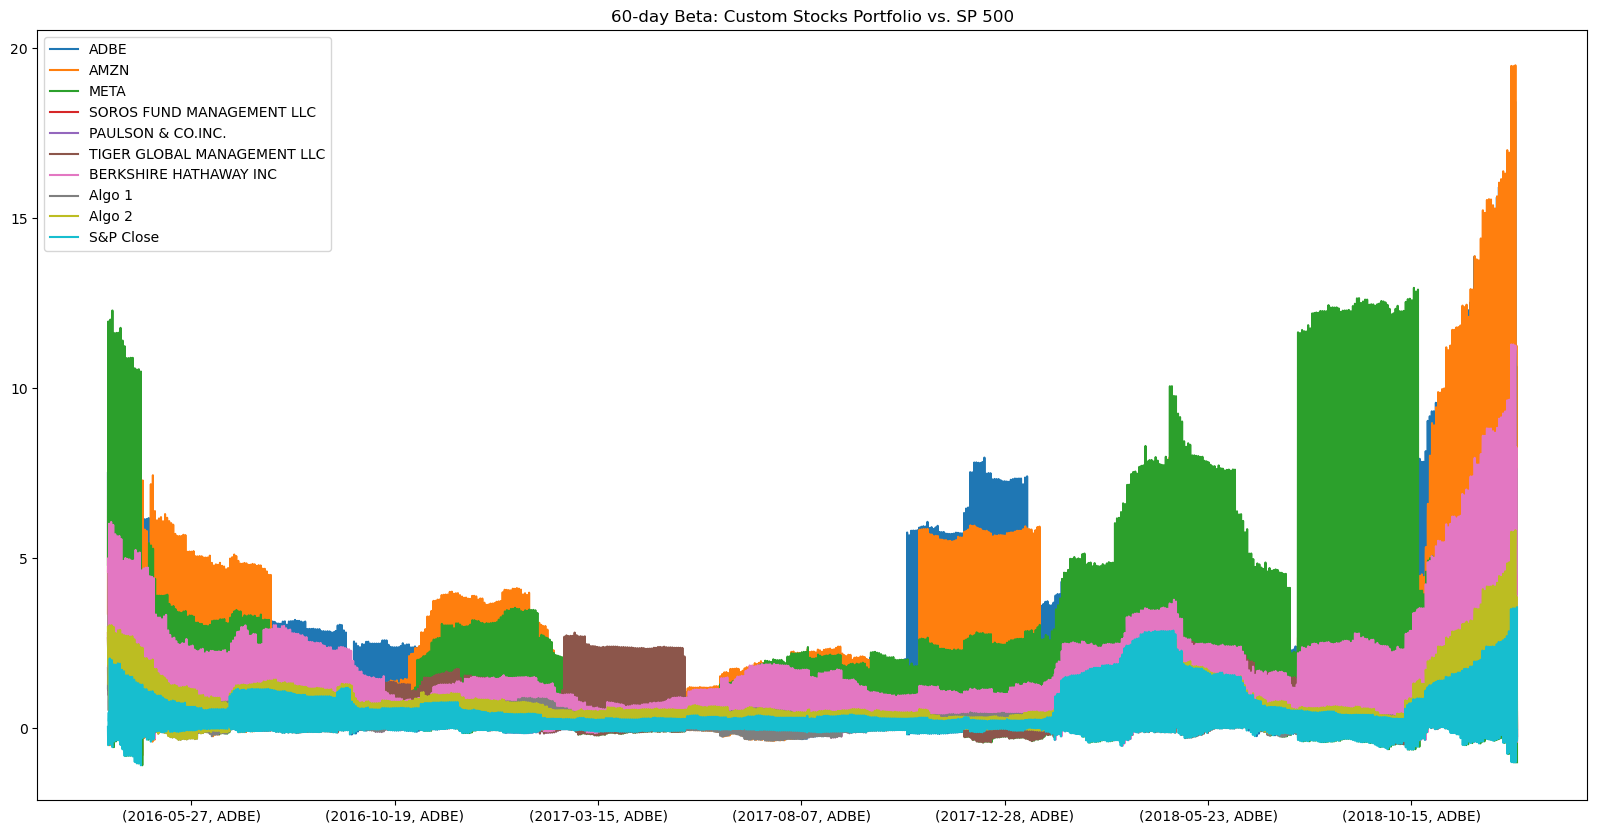

In [72]:
# Calculate and plot Beta
combine_portfolios_df_covariance = combine_portfolios_df.rolling(window=60).cov()
combine_portfolios_df_beta = combine_portfolios_df_covariance / variance
combine_portfolios_df_beta.plot(figsize=(20,10), title=("60-day Beta: Custom Stocks Portfolio vs. SP 500")) 

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [74]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_cp = (combine_portfolios_df.mean() * 252) / (combine_portfolios_df.std() * np.sqrt(252))
sharpe_ratio_cp

ADBE                           1.204585
AMZN                           1.106297
META                           0.452155
SOROS FUND MANAGEMENT LLC      0.007089
PAULSON & CO.INC.             -0.860412
TIGER GLOBAL MANAGEMENT LLC   -0.171505
BERKSHIRE HATHAWAY INC         0.396762
Algo 1                         0.940269
Algo 2                         0.358570
S&P Close                     -0.494078
dtype: float64

<Axes: title={'center': 'Sharpe Ratios: Custom Stocks Portfolio vs. SP 500'}>

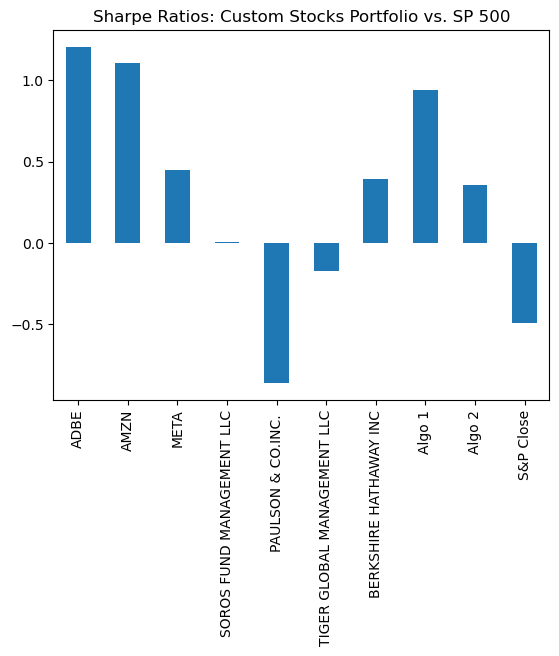

In [76]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_cp.plot.bar(title="Sharpe Ratios: Custom Stocks Portfolio vs. SP 500")

### How does your portfolio do?

Write your answer here!

ADBE and AMNZ have a Sharpe Ratio above 1 and greater than the other portfolios which is generally considered good, offering excess returns relative to volatility.